In [3]:
import pandas as pd
import numpy as np
import random

card_values = {'AS':11,'AD':11,'AC':11,'AH':11,
         'KS':10,'KD':10,'KC':10,'KH':10,
         'QS':10,'QD':10,'QC':10,'QH':10,
         'JS':10,'JD':10,'JC':10,'JH':10,
         '10S':10,'10D':10,'10C':10,'10H':10,
         '9S':9,'9D':9,'9C':9,'9H':9,
         '8S':8,'8D':8,'8C':8,'8H':8,
         '7S':7,'7D':7,'7C':7,'7H':7,
         '6S':6,'6D':6,'6C':6,'6H':6,
         '5S':5,'5D':5,'5C':5,'5H':5,
         '4S':4,'4D':4,'4C':4,'4H':4,
         '3S':3,'3D':3,'3C':3,'3H':3,
         '2S':2,'2D':2,'2C':2,'2H':2}

cards = ['AS','AD','AC','AH',
         'KS','KD','KC','KH',
         'QS','QD','QC','QH',
         'JS','JD','JC','JH',
         '10S','10D','10C','10H',
         '9S','9D','9C','9H',
         '8S','8D','8C','8H',
         '7S','7D','7C','7H',
         '6S','6D','6C','6H',
         '5S','5D','5C','5H',
         '4S','4D','4C','4H',
         '3S','3D','3C','3H',
         '2S','2D','2C','2H']

global deck
deck = random.sample(cards,len(cards))

class Hand():
    def __init__(self):
        self.hand = []
        self.bet = 1
        self.double = False

In [4]:
# player action is to hit
def hit(player_hand):
    global deck
    if len(deck) == 0:
        deck = random.sample(cards,len(cards))
    new_card = deck.pop()
    player_hand.hand.append(new_card)
    return new_card

# player action is to stay
def stay():
    pass

# player action is to double
def double(player_hand):
    player_hand.double = True
    player_hand.bet = player_hand.bet*2
    hit(player_hand)
    return 

# Checks if split is possible
def split_possible(hand, up_card_value):
    split = 0
    if card_values[hand[0]] == card_values[hand[1]]:
        split = split_chart[up_card_value][card_values[hand[0]]]
    if split == 1:
        return True
    return False

# player action is to split
def split(player_hand):
    ghost_hand = Hand()
    new_hand = Hand()
    ghost_hand.hand = [player_hand.hand[0]]
    new_hand.hand = [player_hand.hand[1]]
    hit(ghost_hand)
    hit(new_hand)
    ghost_hand.bet = player_hand.bet
    new_hand.bet = new_hand.bet
    return ghost_hand, new_hand
    
# dealer follows house rules
def play_dealer(dealer_hand):
    total = value_check(dealer_hand)
    done = False
    while total < 17:
        hit(dealer_hand)
        total=value_check(dealer_hand)
    if total == 17 & (contains_ace(dealer_hand.hand)):
        hit(dealer_hand)
    return total
        
# Helper function to see if ace is in hand
def contains_ace(hand):
    for card in hand:
        if card in (['AS','AD','AC','AH']):
            return True
    return False

# Returns hand value
def value_check(player_hand):
    total = [0]
    for card in player_hand.hand:
        ace = contains_ace([card])
        if not ace:
            total = [i + card_values[card] for i in total]
        else:
            player_hand.soft = True
            soft = [i + 1 for i in total]
            hard = [i + card_values[card] for i in total]
            total = soft + hard
    
    if min(total) > 21:
        return min(total)
    else:
        total = filter(lambda x: x<=21, total)
        return max(total)

In [5]:
# Dataframe for hard hitting logic

hard_hit = pd.DataFrame(np.array([[0,0,0,0,0,1,1,1,1,1],
          [0,0,0,0,0,1,1,1,1,1],
          [0,0,0,0,0,1,1,1,1,1],
          [0,0,0,0,0,1,1,1,1,1],
          [1,1,0,0,0,1,1,1,1,1]]),
                        columns=[2,3,4,5,6,7,8,9,10,11])
hard_hit['index'] = np.array([16,15,14,13,12])
hard_hit = hard_hit.set_index('index')
hard_hit

,2,3,4,5,6,7,8,9,10,11
index,,,,,,,,,,
16,0,0,0,0,0,1,1,1,1,1
15,0,0,0,0,0,1,1,1,1,1
14,0,0,0,0,0,1,1,1,1,1
13,0,0,0,0,0,1,1,1,1,1
12,1,1,0,0,0,1,1,1,1,1


In [6]:
# Dataframe for soft hitting logic

soft_hit = pd.DataFrame(np.array([[0,0,0,0,0,0,0,1,1,0]]),
                        columns=[2,3,4,5,6,7,8,9,10,11])
soft_hit['index'] = np.array([18])
soft_hit = soft_hit.set_index('index')
soft_hit

,2,3,4,5,6,7,8,9,10,11
index,,,,,,,,,,
18,0,0,0,0,0,0,0,1,1,0


In [7]:
# Dataframe for hard doubling logic

hard_double = pd.DataFrame(np.array([[1,1,1,1,1,1,1,1,1,1],
                                [1,1,1,1,1,1,1,1,0,0],
                                [1,1,1,1,1,0,0,0,0,0],
                                [0,0,0,0,0,0,0,0,0,0],
                               ]),
                        columns=[2,3,4,5,6,7,8,9,10,11])
hard_double['index'] = np.array([11,10,9,8])
hard_double = hard_double.set_index('index')
hard_double

,2,3,4,5,6,7,8,9,10,11
index,,,,,,,,,,
11,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,0,0
9,1,1,1,1,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0


In [8]:
# Dataframe for soft doubling logic

soft_double = pd.DataFrame(np.array([[0,1,1,1,1],
                                [1,1,1,1,1],
                                [0,0,1,1,1],
                                [0,0,1,1,1],
                                [0,0,1,1,1],
                                [0,0,1,1,1],
                                [0,0,0,1,1]
                               ]),
                        columns=[2,3,4,5,6])
soft_double['index'] = np.array([18,17,16,15,14,13,12])
soft_double = soft_double.set_index('index')
soft_double

,2,3,4,5,6
index,,,,,
18,0,1,1,1,1
17,1,1,1,1,1
16,0,0,1,1,1
15,0,0,1,1,1
14,0,0,1,1,1
13,0,0,1,1,1
12,0,0,0,1,1


In [9]:
# Dataframe for splitting logic

split_chart = pd.DataFrame(np.array([[1,1,1,1,1,1,1,1,1,1],
          [0,0,0,0,0,0,0,0,0,0],
          [1,1,1,1,1,1,0,1,0,0],
          [1,1,1,1,1,1,1,1,1,1],
          [1,1,1,1,1,1,1,0,0,0],
          [1,1,1,1,1,1,0,0,0,0],
          [0,0,0,0,0,0,0,0,0,0],
          [0,0,0,1,0,0,0,0,0,0],
          [1,1,1,1,1,1,0,0,0,0],
          [1,1,1,1,1,1,0,0,0,0]]),
                        columns=[2,3,4,5,6,7,8,9,10,11])
split_chart['index'] = np.array([11,10,9,8,7,6,5,4,3,2])
split_chart = split_chart.set_index('index')
split_chart

,2,3,4,5,6,7,8,9,10,11
index,,,,,,,,,,
11,1,1,1,1,1,1,1,1,1,1
10,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,0,1,0,0
8,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,0,0,0
6,1,1,1,1,1,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
3,1,1,1,1,1,1,0,0,0,0


In [11]:
# Initialization of variables

iterations = 1000000
dealer_hand = Hand()
player_hand = [Hand()]

iteration_list =[]
total_money =[]
edge_list =[]

def run(iterations):
    
    # Variables to track different statistics
    winnings=0
    losings=0
    games_won=0
    games_lost=0
    games_pushed=0
    global deck
    
    # Iterations of playing hands
    while iterations>0:
        
        
        iterations -= 1
        dealer_hand = Hand()
        player_hand = [Hand()]
        
        # Add more cards if deck is empty
        if len(deck) == 0:
            deck = random.sample(cards,len(cards))
        
        # Deals hands to Player and Dealer - saves card for dealer to use in decision making
        hit(player_hand[0])
        hit(dealer_hand)
        hit(player_hand[0])
        up_card = hit(dealer_hand)
        up_card_value = card_values[up_card]
        
#         print("player_hand: "+str(player_hand[0].hand))
#         print("dealer_hand: "+str(dealer_hand.hand))
        
        value = value_check(player_hand[0])
        dealer_value = value_check(dealer_hand)
        
        # Check for Blackjack
        if (value == 21) & (dealer_value != 21):
            winnings += (player_hand[0].bet * 1.5)
            games_won += 1
        elif (value == 21) & (dealer_value == 21):
            games_pushed +=1
        elif (value != 21) & (dealer_value == 21):
            losings -= (player_hand[0].bet)
            games_lost += 1
        else:

#             # First check for splitting
#             split_option = split_possible(player_hand[0].hand,up_card_value)
# #             print("Starting Hand: "+str(player_hand[0].hand))
#             if split_option:
# #                 print("SPLIT!!!")
#                 for hand in player_hand:
#                     if split_possible(hand.hand,up_card_value):
#                         new_1, new_2 = split(hand)                      
#                         player_hand.append(new_1)
#                         player_hand.append(new_2)
#                         player_hand.remove(hand)
                
#             end_values = []
#             for hand in player_hand:

#                 # Check if hand is soft and assign value
#                 soft = contains_ace(hand.hand)
#                 value = value_check(hand)
#                 dealer_value = value_check(dealer_hand)


#                 # Next check for doubling
#                 if soft:
#                     if (value > 18) | (value < 12) | (up_card_value > 6):
#                         double_or_not = 0
#                     else:
#                         double_or_not = soft_double[up_card_value][value]
#                 else:
#                     if (value > 11) | (value < 8):
#                         double_or_not = 0
#                     else:
#                         double_or_not = hard_double[up_card_value][value]

#                 # Carry out doubling or continue

#                 if double_or_not == 1:
#                     double(hand)

#                 # Continue if not doubled
#                 if not hand.double:

#                     hit_or_not=1
#                     while hit_or_not:

#                         # Next apply standing numbers logic
#                         if soft:
#                             if (value > 18):
#                                 hit_or_not = 0
#                             elif (value < 18):
#                                 hit_or_not = 1
#                             else:
#                                 hit_or_not = soft_hit[up_card_value][value]
#                         else:
#                             if (value > 16):
#                                 hit_or_not = 0
#                             elif (value < 12):
#                                 hit_or_not = 1
#                             else:
#                                 hit_or_not = hard_hit[up_card_value][value]

#                         if hit_or_not == 1:
#                             hit(hand)
#                             soft = contains_ace(hand.hand)
#                             value = value_check(hand)
#                         else:
#                             break
# #                 print("Final Hand: "+str(hand.hand))
#                 value = value_check(hand)
#                 end_values.append((value, hand.bet))
# #             print("Dealer UpCard: "+str(up_card))
            end_values = []
            end_values.append((play_dealer(player_hand[0]),1))
            dealer_value = play_dealer(dealer_hand)
#             print("Dealer Final Hand: "+str(dealer_hand.hand))
#             print("Dealer Final Value: "+str(dealer_value))
#             print("Values: "+str(end_values))
            for value, bet in end_values:
                # Check for bust
                if value > 21:
                    losings -= bet
                    games_lost += 1
#                     print("LOST!")

                # Check for dealer bust
                elif dealer_value > 21:
                    winnings += bet
                    games_won += 1
#                     print("WON!")

                # Compare hand to dealer for push
                elif value == dealer_value:
                    games_pushed +=1
#                     print("PUSH!")

                # Compare for winning hand
                elif value > dealer_value:
                    winnings += bet
                    games_won += 1
#                     print("WON!")

                # Only remaining option is loss
                else:
                    losings -= bet
                    games_lost += 1
#                     print("LOST!")
#             print("\n\n\n")
        iteration_list.append(iterations-1000000)
        total_money.append(winnings+losings)
        edge_list.append((winnings/(winnings+abs(losings))))
    return winnings, games_won, games_lost, games_pushed, losings
            
        
winnings, wins, lost, pushed, losings = run(iterations)
print("Amount Won: $"+str(float(winnings)))
print("Amount Lost: $"+str(float(losings)))
print("Ending Amount: $"+str(float(winnings+losings)))
print("Hands Won: "+str(wins))
print("Hands Lost: "+str(lost))
print("Hands Pushed: "+str(pushed))
print("Winning %: "+str(wins/(wins+lost+pushed)))
print("Losing %: "+str(lost/(wins+lost+pushed)))
print("Edge vs. Dealer: "+str(winnings/(winnings+abs(losings))))

Amount Won: $434778.0
Amount Lost: $-493009.0
Hands Won: 411781
Hands Lost: 493009
Hands Pushed: 95210
Winning %: 0.411781
Losing %: 0.493009
Edge vs. Dealer: 0.46861833588959534


<function matplotlib.pyplot.show(*args, **kw)>

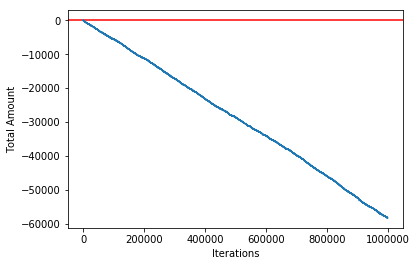

In [14]:
import matplotlib.pyplot as plt
plt.axhline(y=0,color='r', linestyle='-')
plt.plot(total_money)
plt.xlabel("Iterations")
plt.ylabel("Total Amount")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

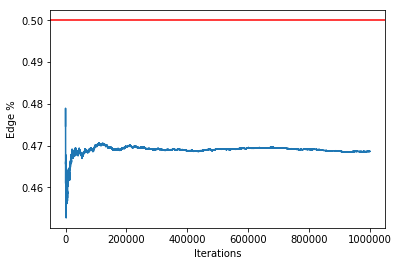

In [13]:
plt.axhline(y=0.5,color='r', linestyle='-')
ax = plt.plot(edge_list[1000:])
plt.xlabel("Iterations")
plt.ylabel("Edge %")
plt.show